# 線形モデルによる回帰

# 線形回帰モデルによる学習

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('sklearn version : ' + sklearn.__version__)

sklearn version : 0.24.2


## データセットの読み込み

In [2]:
from sklearn.datasets import load_iris

dataset = load_iris()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print('特徴量の種類')
print(dataset['feature_names'])
print('\nターゲット名の種類')
print(dataset['target_names'])
print('\nshape')
print(dataset['data'].shape)
print('\n特徴量の確認')
print(dataset['data'][:5])
print('\nラベルの確認')
print(dataset['target'][:5])

特徴量の種類
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

ターゲット名の種類
['setosa' 'versicolor' 'virginica']

shape
(150, 4)

特徴量の確認
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

ラベルの確認
[0 0 0 0 0]


Text(0, 0.5, 'sepal width (cm)')

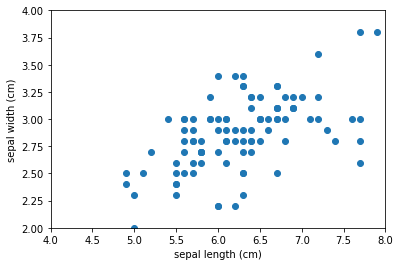

In [4]:
data = dataset['data']
data = data[dataset['target'] > 0] #versicolorとvirginicaのデータのみになるようフィルタリング
X = data[:, 0]
y = data[:, 1]
plt.plot(X, y, 'o')
plt.xlim(4, 8)
plt.ylim(2, 4)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

print("X : \n", X[:5])
print("y : \n", y[:5])

X_train.shape :  (80, 1)
X_test.shape :  (20, 1)
y_train.shape :  (80, 1)
y_test.shape :  (20, 1)
X : 
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y : 
 [[3.2]
 [3.2]
 [3.1]
 [2.3]
 [2.8]]


## モデルの学習

線形回帰モデル(LinearRegression)で学習を行う。
このモデルは最小二乗法を用いて学習を行う。
$$
y = w^T x + b
$$

In [6]:
lr = LinearRegression().fit(X_train, y_train)

モデルの重み$w$はcoef、バイアス$b$はinterceptで確認を行うことができる。

In [7]:
print("coef_:", lr.coef_)
print("intercept_:", lr.intercept_)

coef_: [[0.25013634]]
intercept_: [1.3428924]


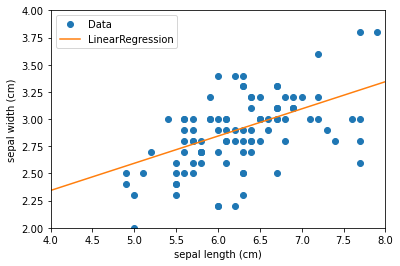

In [8]:
line = np.linspace(4, 8, 10).reshape(-1, 1)
y_est = lr.predict(line)
plt.plot(X, y, 'o')
plt.plot(line, y_est)
plt.xlim(4, 8)
plt.ylim(2, 4)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(["Data", "LinearRegression"], loc="best")

## モデルの評価

In [9]:
lr.score(X_train, y_train)

0.28649475509594335

In [10]:
lr.score(X_test, y_test)

0.05171850502453179

-----------
# リッジ回帰
モデルの計算式は通常最小二乗法と同じだが、傾きをより小さくするよう制限が加えられている。  
この制限は正規化と呼ばれ、過剰適合を防止する目的がある。
リッジ回帰で用いられている正規化はL2正規化である。  
リッジ回帰のコスト関数$J(w)$は次のようにあらわされる。  
$$
J(w)_r = \sum_{i=1}^n (y - \hat y)^2 + \lambda ||w||_2^2
$$
ここで$\hat y$は$y$の平均値、$\lambda$は正規化の重みを決めるハイパーパラメータ、$||w||_2$はL2ノルムである。  
## モデルの学習

In [11]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("coef_:", ridge.coef_)
print("intercept_:", ridge.intercept_)

coef_: [[0.2434965]]
intercept_: [1.38465704]


線形回帰モデルとリッジ回帰モデルを図示すると、リッジ回帰モデルのほうがcoefの大きさが小さいことがわかる。

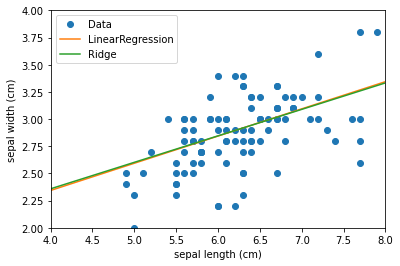

In [12]:
line = np.linspace(4, 8, 10).reshape(-1, 1)
y_est = lr.predict(line)
y_est_ridge = ridge.predict(line)
plt.plot(X, y, 'o')
plt.plot(line, y_est)
plt.plot(line, y_est_ridge)
plt.xlim(4, 8)
plt.ylim(2, 4)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(["Data", "LinearRegression", "Ridge"], loc="best")

## モデルの評価

In [13]:
ridge.score(X_train, y_train)

0.2862928815921766

In [14]:
ridge.score(X_test, y_test)

0.04351029391933081

## リッジ回帰モデルのハイパーパラメータによる調整
リッジ回帰にはハイパーパラメータとしてalphaパラメータがあり、値を大きくすると正規化の度合いが強くなり係数はより0に近づく。  
制約がより強まるため過剰適合の可能性が小さくなるが、訓練データによる学習が行われにくくなる。

In [15]:
ridge100 = Ridge(alpha=100).fit(X_train, y_train)
print("coef_:", ridge100.coef_)
print("intercept_:", ridge100.intercept_)

coef_: [[0.06711689]]
intercept_: [2.49408474]


In [16]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("coef_:", ridge10.coef_)
print("intercept_:", ridge10.intercept_)

coef_: [[0.19654182]]
intercept_: [1.68000193]


----------
# 各モデルの比較
LinearRegresionモデルとRidgeモデル(alpha値別)のそれぞれの結果をグラフ化すると下記のようになる。  
確かにRidgeモデルの場合はalphaの値が大きい方が直前の傾きが小さくなっていることがわかる。

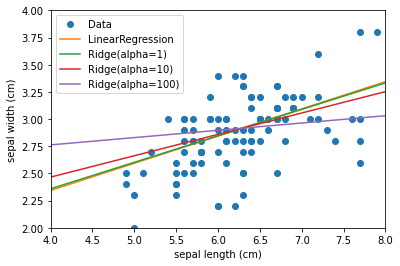

In [17]:
line = np.linspace(4, 8, 10).reshape(-1, 1)

plt.plot(X, y, 'o')
plt.plot(line, lr.coef_[0] * line + lr.intercept_)
plt.plot(line, ridge.coef_[0] * line + ridge.intercept_)
plt.plot(line, ridge10.coef_[0] * line + ridge10.intercept_)
plt.plot(line, ridge100.coef_[0] * line + ridge100.intercept_)
plt.xlim(4, 8)
plt.ylim(2, 4)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(["Data", "LinearRegression", "Ridge(alpha=1)", "Ridge(alpha=10)", "Ridge(alpha=100)"], loc="best")

----------
## グリッドサーチによるハイパーパラメータのチューニング
モデルでのハイパーパラメータをチューニングする場合グリッドサーチがよく用いられる。  
sklearnではGridSearchCVで簡単に実装ができる。

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {
    "alpha": [10**(-4), 10**(-3), 10**(-2), 10**(-1), 10**0, 10**(1)],
  }
]
grid_search = GridSearchCV(Ridge(), param_grid, cv=3) #cvは交差検証の分割数
grid_search.fit(X, y) #GridSearchCV内で交差検証を行うためすべての学習データ(X, y)を入力する
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 1}
0.20754582917862033


Text(0, 0.5, 'test score')

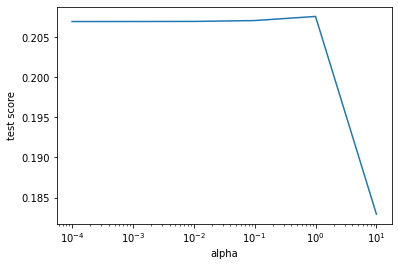

In [19]:
scores = np.array(grid_search.cv_results_['mean_test_score'])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(param_grid[0]["alpha"], scores)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('test score')

----------
# 多項式回帰

多項式モデルによる学習を行う。  
次元p=3の時は下記のような数式となる。  
$$
y = b + w_1x^1 + w_2x^2 + w_1x^3
$$
この場合でも線形回帰モデルのLinerRegressionを用いるが、前段にPolynomialFeaturesを実行することで次段のLinerRegressionに多項式の入力が入るようにしている。  

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

dataset = load_iris()
data = dataset['data']
data = data[dataset['target'] > 0]
X = data[:, 0]
y = data[:, 1]
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

print("X : \n", X[:5])
print("y : \n", y[:5])

X_train.shape :  (75, 1)
X_test.shape :  (25, 1)
y_train.shape :  (75, 1)
y_test.shape :  (25, 1)
X : 
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y : 
 [[3.2]
 [3.2]
 [3.1]
 [2.3]
 [2.8]]


In [21]:
p = 3
pf = make_pipeline(PolynomialFeatures(degree=p, include_bias=False), 
                              LinearRegression())
pf.fit(X, y)
print("coef_:", pf[1].coef_)
print("intercept_:", pf[1].intercept_)

coef_: [[ 5.31495555 -0.72625769  0.03427964]]
intercept_: [-10.31631922]


次元pの値を変化させればより高次元のモデルを作成することができる。

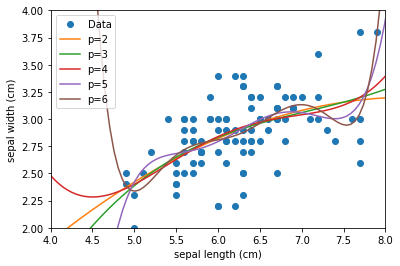

In [22]:
line = np.linspace(4, 9, 100).reshape(-1, 1)
p_max = 7
y_est_list = []
for p in range(2, p_max):
    pf = make_pipeline(PolynomialFeatures(degree=p, include_bias=False), 
                              LinearRegression())
    pf.fit(X, y)
    y_est_list.append(pf.predict(line))

plt.plot(X, y, 'o')
for p in range(p_max-2):
    plt.plot(line, y_est_list[p])
plt.xlim(4, 8)
plt.ylim(2, 4)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(["Data", "p=2", "p=3", "p=4", "p=5", "p=6"], loc="best")
